In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [4]:
data=pd.read_csv('binary.csv')
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
data.shape

(400, 4)

In [6]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [7]:
data.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


In [9]:
x=data.iloc[:,1:]
x

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
395,620,4.00,2
396,560,3.04,3
397,460,2.63,2
398,700,3.65,2


In [10]:
y=data.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [112]:
x_train.shape

(300, 3)

In [113]:
x_test.shape

(100, 3)

In [126]:
(data['admit']==0).sum()

273

In [127]:
(data['admit']==1).sum()

127

<AxesSubplot:xlabel='admit', ylabel='count'>

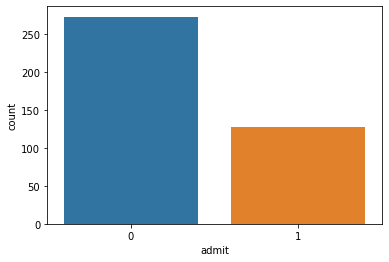

In [130]:
import seaborn as sns
sns.countplot(x='admit',data=data)

In [114]:
clf=LogisticRegression()

In [115]:
clf.fit(x_train,y_train)

LogisticRegression()

In [116]:
pred=clf.predict(x_test)

In [117]:
print('Accuracy',accuracy_score(y_test,pred))

Accuracy 0.72


In [118]:
pd.DataFrame({'actual':y_test,'prediction':pred})

,actual,prediction
398,0,0
125,0,0
328,0,0
339,1,0
172,0,0
...,...,...
300,0,0
277,1,1
289,0,0
260,0,0


In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
clf2=DecisionTreeClassifier()

In [121]:
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
pred2=clf2.predict(x_test)

In [123]:
print('Accuracy',accuracy_score(y_test,pred2))

Accuracy 0.62


In [125]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier(n_estimators=300)
clf3.fit(x_train,y_train)
pred3=clf3.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred3))

Accuracy 0.73
